### Append Path

In [1]:
import sys

sys.path.append("..")

%load_ext autoreload
%autoreload 2

### Load Data

In [2]:
import pandas as pd

df = pd.read_csv("../data/processed/feature_engineered_data.csv")

### Train Test Split

In [3]:
from src.modeling import split_data

X_train, X_test, y_train, y_test = split_data(
    df, target_col="SolarGeneration", test_size=0.2
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (568003, 11)
X_test shape: (142001, 11)


### Model Training

In [4]:
from src.modeling import train_model

model = train_model(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Params: {'num_leaves': 70, 'n_estimators': 2000, 'max_depth': 15, 'learning_rate': 0.01}

Training Complete.


### Model Evaluation

In [5]:
from src.modeling import evaluate_model

preds = evaluate_model(model, X_test, y_test)

MAE (Mean Absolute Error): 2.7523 kWh
RMSE (Root Mean Sq Error): 5.4752 kWh
R2 Score: 0.7678


### Visualization

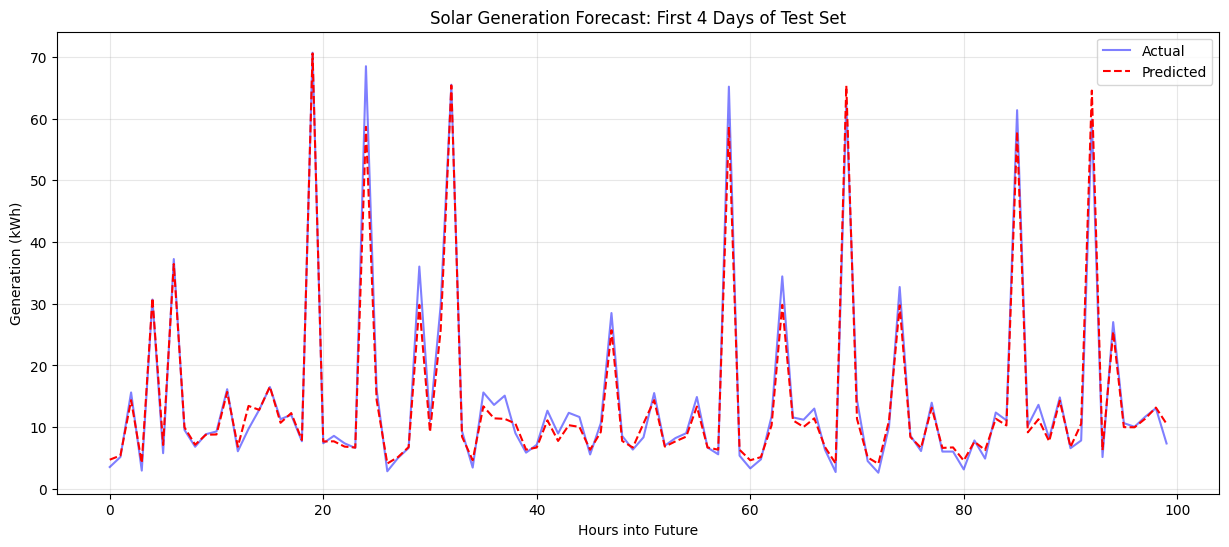

In [ ]:
import matplotlib.pyplot as plt

results = pd.DataFrame({"Actual": y_test, "Predicted": preds})

plt.figure(figsize=(15, 6))
plt.plot(results["Actual"].values[:100], label="Actual", color="blue", alpha=0.5)
plt.plot(
    results["Predicted"].values[:100], label="Predicted", color="red", linestyle="--"
)
plt.title("Solar Generation Forecast: First 4 Days of Test Set")
plt.xlabel("Hours into Future")
plt.ylabel("Generation (kWh)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Feature Importance

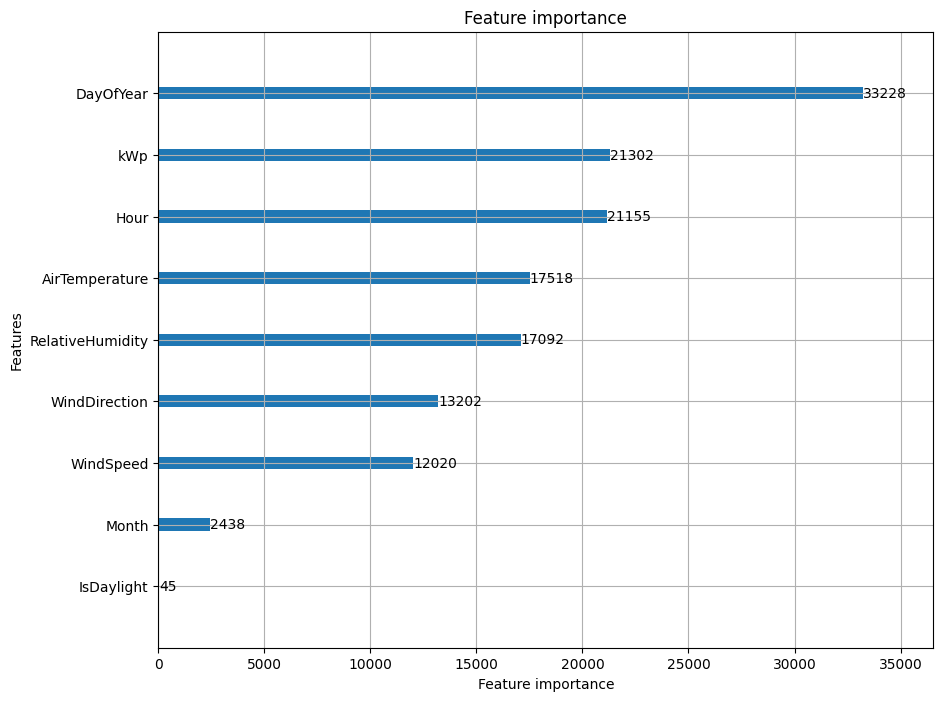

In [ ]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(model, ax=ax, max_num_features=10)
plt.show()

### Save Model

In [9]:
from src.modeling import save_model

save_model(model, "../models/solar_lightgbm.pkl")

Model saved to ../models/solar_lightgbm.pkl
